In [6]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)


2.3.1
2.4.0


In [7]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country wage_class  
0          2174             0              40  United-States      <=50K  
1             0             0              13  United-States      <=50K  
2             0             0              40  United-States      <=50K  
3             0             0              40  United-States      <=50K  
4             0             0              40           Cuba      <=50K

In [8]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [9]:
# X_train

# Keras

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [12]:
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [13]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history])

Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.7902 - val_loss: 0.4125 - val_accuracy: 0.7983
Epoch 2/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3769 - accuracy: 0.8124 - val_loss: 0.3736 - val_accuracy: 0.7966
Epoch 3/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3721 - accuracy: 0.8136 - val_loss: 0.3696 - val_accuracy: 0.8089
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3699 - accuracy: 0.8146 - val_loss: 0.3649 - val_accuracy: 0.8186
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3686 - accuracy: 0.8158 - val_loss: 0.3646 - val_accuracy: 0.8165
Epoch 6/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3689 - accuracy: 0.8136 - val_loss: 0.3769 - val_accuracy: 0.8031
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3677 - accuracy: 0.8130 - val_loss: 0.3662 - val_accuracy: 0.8125

Epoch 58/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3564 - accuracy: 0.8207 - val_loss: 0.3614 - val_accuracy: 0.8185
Epoch 59/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3562 - accuracy: 0.8201 - val_loss: 0.3617 - val_accuracy: 0.8182
Epoch 60/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3556 - accuracy: 0.8203 - val_loss: 0.3677 - val_accuracy: 0.8147
Epoch 61/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3554 - accuracy: 0.8182 - val_loss: 0.3614 - val_accuracy: 0.8171
Epoch 62/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3557 - accuracy: 0.8218 - val_loss: 0.3679 - val_accuracy: 0.8120
Epoch 63/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3593 - accuracy: 0.8166 - val_loss: 0.3685 - val_accuracy: 0.8124
Epoch 64/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3576 - accuracy: 0.8204 - val_loss: 0.3656 - val_accuracy:

In [8]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

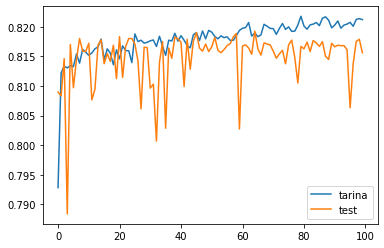

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = "tarina")
plt.plot(history.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

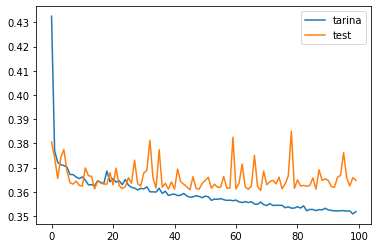

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = "tarina")
plt.plot(history.history['val_loss'], label = "test")
plt.legend()
plt.show()

In [11]:
model.predict(X_test)

array([[3.4630299e-04],
       [1.7408907e-01],
       [5.4691678e-01],
       ...,
       [7.4226511e-01],
       [6.4327645e-01],
       [8.2033813e-01]], dtype=float32)

In [12]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 15us/step


[0.36476381842991906, 0.8156042695045471]

In [13]:
print(model.predict(X_test).shape)
print(y_test.shape)

(15060, 1)
(15060,)


In [14]:
p = model.predict(X_test)
p[p<0.5]=0
p[p>0.5]=1
p

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [15]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= p )

0.8156042496679947

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

# Zad

Porównaj fukcje aktywacji
* sigmoid
* tanh
* relu

# tanh

# relu